# Explore here

Imports

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
import seaborn as sns


Importing Dataset

In [30]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv'
df = pd.read_csv(url)


warnings.filterwarnings('ignore')

In [31]:
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


EDA

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [33]:
df.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [34]:
df.isnull().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

In [35]:
df = df.dropna() 

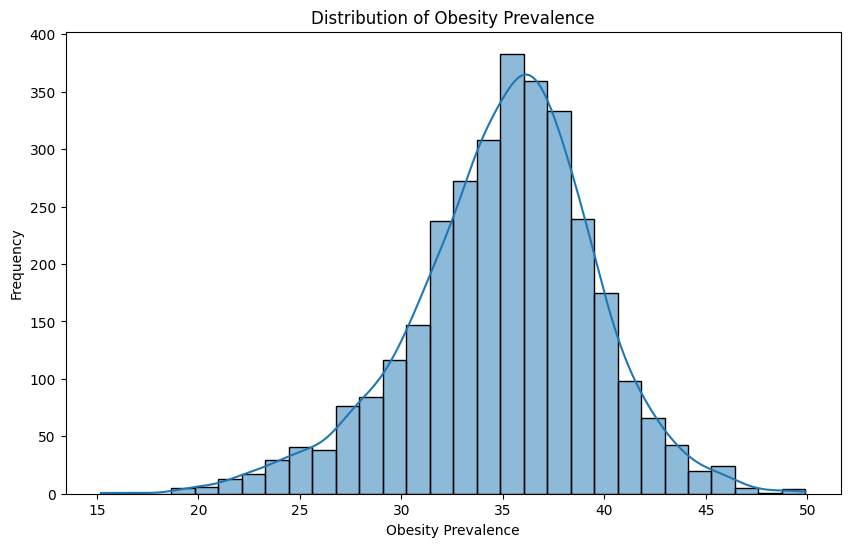

In [47]:
# Plot histogram for a feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Obesity_prevalence'], bins=30, kde=True)
plt.title('Distribution of Obesity Prevalence')
plt.xlabel('Obesity Prevalence')
plt.ylabel('Frequency')
plt.show()


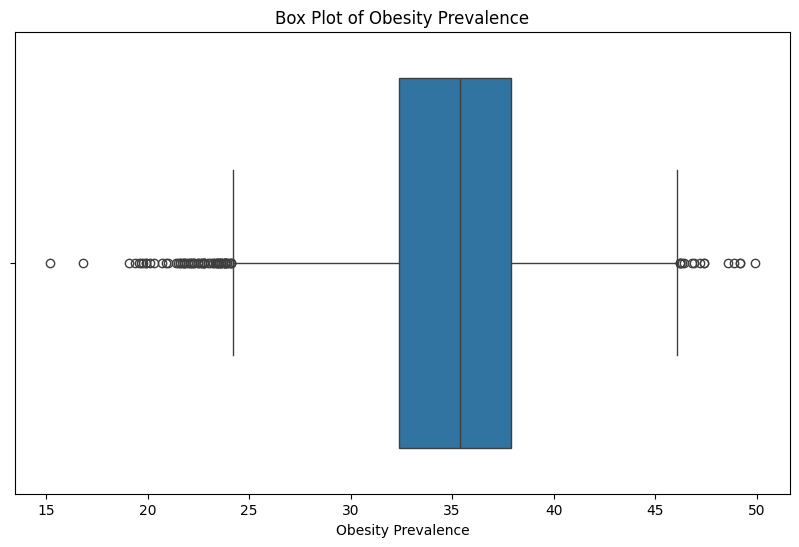

In [48]:
# Plot box plot for a feature
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Obesity_prevalence'])
plt.title('Box Plot of Obesity Prevalence')
plt.xlabel('Obesity Prevalence')
plt.show()


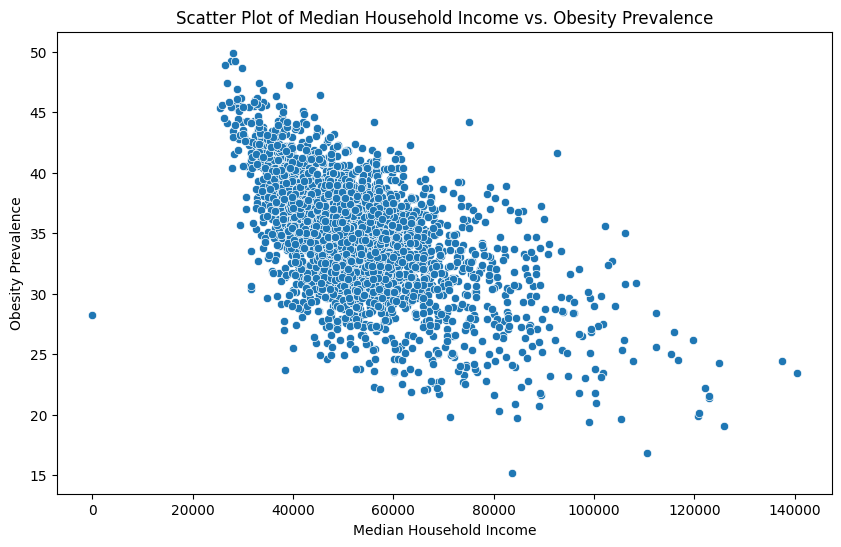

In [49]:
# Plot scatter plot between two features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Median_Household_Income_2018'], y=df['Obesity_prevalence'])
plt.title('Scatter Plot of Median Household Income vs. Obesity Prevalence')
plt.xlabel('Median Household Income')
plt.ylabel('Obesity Prevalence')
plt.show()


In [36]:
target_column = 'Obesity_prevalence'
features_columns = [
    'TOT_POP', '0-9', '10-19 y/o % of total pop', '20-29', '30-39', '40-49', '50-59', 
    '60-69', '70-79', '80+', 'White-alone pop', '% White-alone', 'Black-alone pop', 
    '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 
    'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', 
    '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 
    'Median_Household_Income_2018', 'Civilian_labor_force_2018', 'Employed_2018', 
    'Unemployed_2018', 'Unemployment_rate_2018', 'Active Physicians per 100000 Population 2018 (AAMC)', 
    'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 
    'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 
    'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)', 
    'Active General Surgeons per 100000 Population 2018 (AAMC)', 
    'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)', 
    'Total nurse practitioners (2019)', 'Total physician assistants (2019)', 
    'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)', 
    'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)', 
    'ICU Beds_x', 'Population Aged 60+', 'Percent of Population Aged 60+'
]


In [37]:
features = df[features_columns]
target = df[target_column]

In [38]:
df = df.dropna(subset=[target_column])

In [39]:
features = features.dropna()
target = target.loc[features.index]

print(features.isnull().sum())

TOT_POP                                                                          0
0-9                                                                              0
10-19 y/o % of total pop                                                         0
20-29                                                                            0
30-39                                                                            0
40-49                                                                            0
50-59                                                                            0
60-69                                                                            0
70-79                                                                            0
80+                                                                              0
White-alone pop                                                                  0
% White-alone                                                                    0
Blac

In [40]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [41]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluation
print("Linear Regression R^2:", r2_score(y_test, y_pred))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Linear Regression R^2: 0.5856784795165695
Linear Regression RMSE: 2.924997206253475


Evaluate Lasso Regression

In [42]:
# Lasso Regression Model
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso.predict(X_test)

# Evaluation
print("Lasso Regression R^2:", r2_score(y_test, y_pred_lasso))
print("Lasso Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

Lasso Regression R^2: 0.5471408604913865
Lasso Regression RMSE: 3.0580056129292763


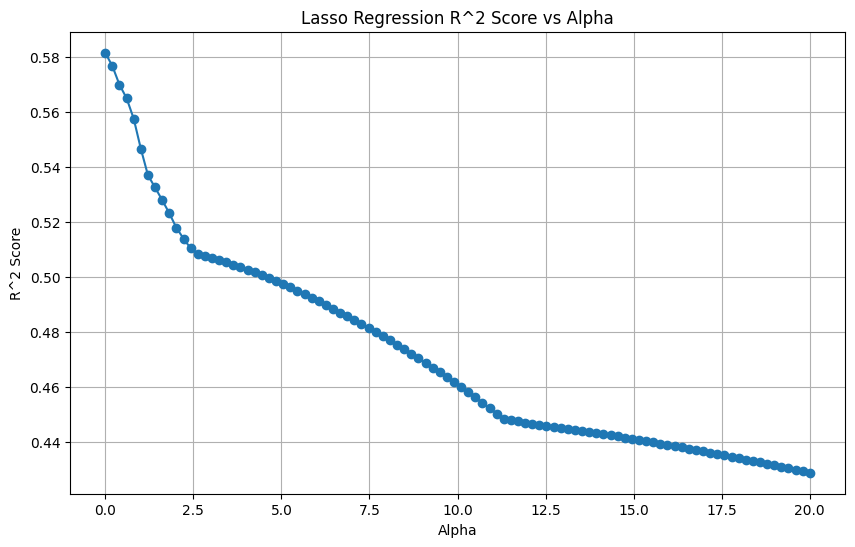

In [43]:
#Varying the alpha parameter
alphas = np.linspace(0, 20, 100)
r2_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred_lasso))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(alphas, r2_scores, marker='o')
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')
plt.title('Lasso Regression R^2 Score vs Alpha')
plt.grid(True)
plt.show()